In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import time
import sys
import os
import utils

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# selected_years = [2014, 2014, 2016, 2017, 2018]
# selected_months = [4, 9, 7, 9, 9]
# selected_days = [2, 2, 2, 2, 2]

In [32]:
dir_labeled = "../../research/network/dataset_network_sub_label_ip_month/"
dir_graph = "./graph_copy_2/"
year = 2013
month = 7

In [5]:
# Get G_pre and G_real
# path_graph = dir_labeled + utils.toStrYearMonth(year, month) + ".pkl"
# G_pre = pd.read_pickle(path_graph)
# [year, month] = utils.getNextYearMonth(year, month)
# path_graph = dir_labeled + utils.toStrYearMonth(year, month) + ".pkl"
# G_real = pd.read_pickle(path_graph)

In [33]:
# Get G_pre and G_real
path_graph = dir_graph + utils.toStrYearMonth(year, month) + ".gexf"
G_pre = nx.read_gexf(path_graph, node_type=int)
[year, month] = utils.getNextYearMonth(year, month)
path_graph = dir_graph + utils.toStrYearMonth(year, month) + ".gexf"
G_real = nx.read_gexf(path_graph, node_type=int)

### Goal

1. distribution of difference between each two months
2. sample of 10 edges weight distribution

In [5]:
nodes_appear = [n for n in G_real if n not in G_pre]
nodes_disappear = [n for n in G_pre if n not in G_real]
print("# nodes in pre: " + str(len(G_pre.nodes)))
print("# nodes in next: " + str(len(G_real.nodes)))
print("# nodes appear: " + str(len(nodes_appear)) + "; " + "{:12.2f}".format(len(nodes_appear) / len(G_pre.nodes) * 100) + "%")
print("# nodes disappear: " + str(len(nodes_disappear)) + "; " + "{:12.2f}".format(len(nodes_disappear) / len(G_pre.nodes) * 100) + "%")

# nodes in pre: 455743
# nodes in next: 1028115
# nodes appear: 758605;       166.45%
# nodes disappear: 186233;        40.86%


In [6]:
edges_appear = [e for e in G_real.edges if e not in G_pre.edges]
edges_disappear = [e for e in G_pre.edges if e not in G_real.edges]
print("# edges in pre: " + str(len(G_pre.edges)))
print("# edges in next: " + str(len(G_real.edges)))
print("# edges appear: " + str(len(edges_appear)) + "; " + "{:12.2f}".format(len(edges_appear) / len(G_pre.edges) * 100) + "%")
print("# edges disappear: " + str(len(edges_disappear)) + "; " + "{:12.2f}".format(len(edges_disappear) / len(G_pre.edges) * 100) + "%")

# edges in pre: 771890
# edges in next: 1725008
# edges appear: 1252909;       162.32%
# edges disappear: 299791;        38.84%


In [21]:
G_pre.head(10)

,IP_SRC,IP_DST,RTT
0,0,1,19332
1,1,2,657
2,2,3,413
3,3,678316,4605
4,678316,678317,4628
5,678317,46,24540
6,46,82,24722
7,82,83,36820
8,83,84,126407
9,84,85,134827


In [20]:
G_pre.groupby(['IP_SRC', 'IP_DST']).size().sort_values(ascending=False)

IP_SRC  IP_DST
421437  421438    245133
421438  421439    245112
0       1         230895
1       2         230890
2       3         229366
                   ...  
164042  973327         1
164038  339268         1
164031  647401         1
        195492         1
100466  59281          1
Length: 1085448, dtype: int64

In [19]:
G_nodes = G_pre[['IP_SRC', 'IP_DST']]

In [20]:
s1 = G_nodes.IP_SRC.value_counts()
s2 = G_nodes.IP_DST.value_counts()

s = s1.add(s2, fill_value=0).sort_values(ascending=False)

s

612861    301544.0
355078    263364.0
355079    263227.0
308020    263162.0
308021    261476.0
            ...   
468600         1.0
240767         1.0
240768         1.0
468599         1.0
678315         1.0
Length: 678316, dtype: float64

In [51]:
G_nodes_n = G_real[['IP_SRC', 'IP_DST']]
s1_n = G_nodes_n.IP_SRC.value_counts()
s2_n = G_nodes_n.IP_DST.value_counts()

s_n = s1_n.add(s2_n, fill_value=0).sort_values(ascending=False)

In [32]:
len(s)

623342

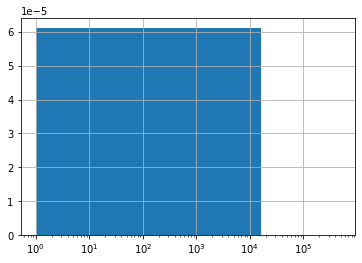

In [37]:
fig, ax = plt.subplots()
s.hist(ax=ax, bins=30, density=True)
ax.set_xscale('log')

In [40]:
print(np.log10(s))

421438    5.690428
421439    5.690044
1         5.664445
2         5.664441
3         5.661559
            ...   
808791    0.000000
808790    0.000000
395725    0.000000
808788    0.000000
712966    0.000000
Length: 623342, dtype: float64


(array([2.43800334e+00, 8.18371058e-01, 3.19276438e-01, 3.70808924e-01,
        3.21982888e-01, 2.29904409e-01, 1.97832985e-01, 1.43078133e-01,
        1.19904161e-01, 8.59720529e-02, 6.59189553e-02, 4.50285499e-02,
        3.25957985e-02, 2.42058057e-02, 1.79640571e-02, 1.25934468e-02,
        8.88053670e-03, 6.13179915e-03, 4.18653873e-03, 2.73182224e-03,
        2.28356658e-03, 1.68307315e-03, 9.30341940e-04, 5.92035780e-04,
        3.29848506e-04, 2.53729620e-04, 1.26864810e-04, 1.69153080e-04,
        1.01491848e-04, 1.69153080e-04]),
 array([0.        , 0.18968094, 0.37936188, 0.56904282, 0.75872376,
        0.94840471, 1.13808565, 1.32776659, 1.51744753, 1.70712847,
        1.89680941, 2.08649035, 2.27617129, 2.46585223, 2.65553318,
        2.84521412, 3.03489506, 3.224576  , 3.41425694, 3.60393788,
        3.79361882, 3.98329976, 4.1729807 , 4.36266164, 4.55234259,
        4.74202353, 4.93170447, 5.12138541, 5.31106635, 5.50074729,
        5.69042823]),
 <a list of 30 Patch obj

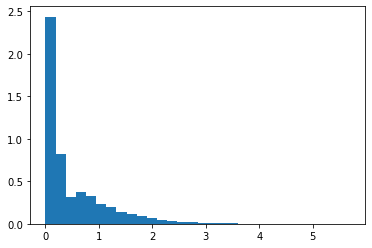

In [41]:
plt.hist(np.log10(s), bins=30, density=True) 

More than 50% nodes was used less than 10 times.

In [21]:
s_top20 = s[:int(0.2*(len(s)))]

s_top20

612861    301544.0
355078    263364.0
355079    263227.0
308020    263162.0
308021    261476.0
            ...   
109521         9.0
137340         9.0
303686         9.0
38143          9.0
448619         9.0
Length: 135663, dtype: float64

In [69]:
s_n_top20 = s_n[:int(0.1*(len(s_n)))]

s_n_top20

308020    354775.0
308021    354234.0
355078    350570.0
355079    350490.0
355080    349085.0
            ...   
150226        24.0
14972         24.0
56993         24.0
44694         24.0
7335          24.0
Length: 45574, dtype: float64

In [66]:
nodes_appear = [n for n in s_top20 if n not in s_n_top20]
nodes_disappear = [n for n in s_n_top20 if n not in s_top20]
print("# nodes in pre: " + str(len(s_top20)))
print("# nodes in next: " + str(len(s_n_top20)))
print("# nodes appear: " + str(len(nodes_appear)) + "; " + "{:12.2f}".format(len(nodes_appear) / (len(s_n_top20) + len(s_top20)) * 100) + "%")
print("# nodes disappear: " + str(len(nodes_disappear)) + "; " + "{:12.2f}".format(len(nodes_disappear) / (len(s_n_top20) + len(s_top20)) * 100) + "%")

# nodes in pre: 124668
# nodes in next: 91148
# nodes appear: 40510;        18.77%
# nodes disappear: 22298;        10.33%


In [70]:
nodes_appear = [n for n in s_top20 if n not in s_n_top20]
nodes_disappear = [n for n in s_n_top20 if n not in s_top20]
print("# nodes in pre: " + str(len(s_top20)))
print("# nodes in next: " + str(len(s_n_top20)))
print("# nodes appear: " + str(len(nodes_appear)) + "; " + "{:12.2f}".format(len(nodes_appear) / (len(s_n_top20) + len(s_top20)) * 100) + "%")
print("# nodes disappear: " + str(len(nodes_disappear)) + "; " + "{:12.2f}".format(len(nodes_disappear) / (len(s_n_top20) + len(s_top20)) * 100) + "%")

# nodes in pre: 62334
# nodes in next: 45574
# nodes appear: 23247;        21.54%
# nodes disappear: 12986;        12.03%


In [11]:
# dict_e_rtt = {}

# for name,group in G_pre.groupby(['IP_SRC', 'IP_DST']):
#    dict_e_rtt[name] = group.RTT

In [16]:
plt.rcParams["figure.figsize"]=[20,15]

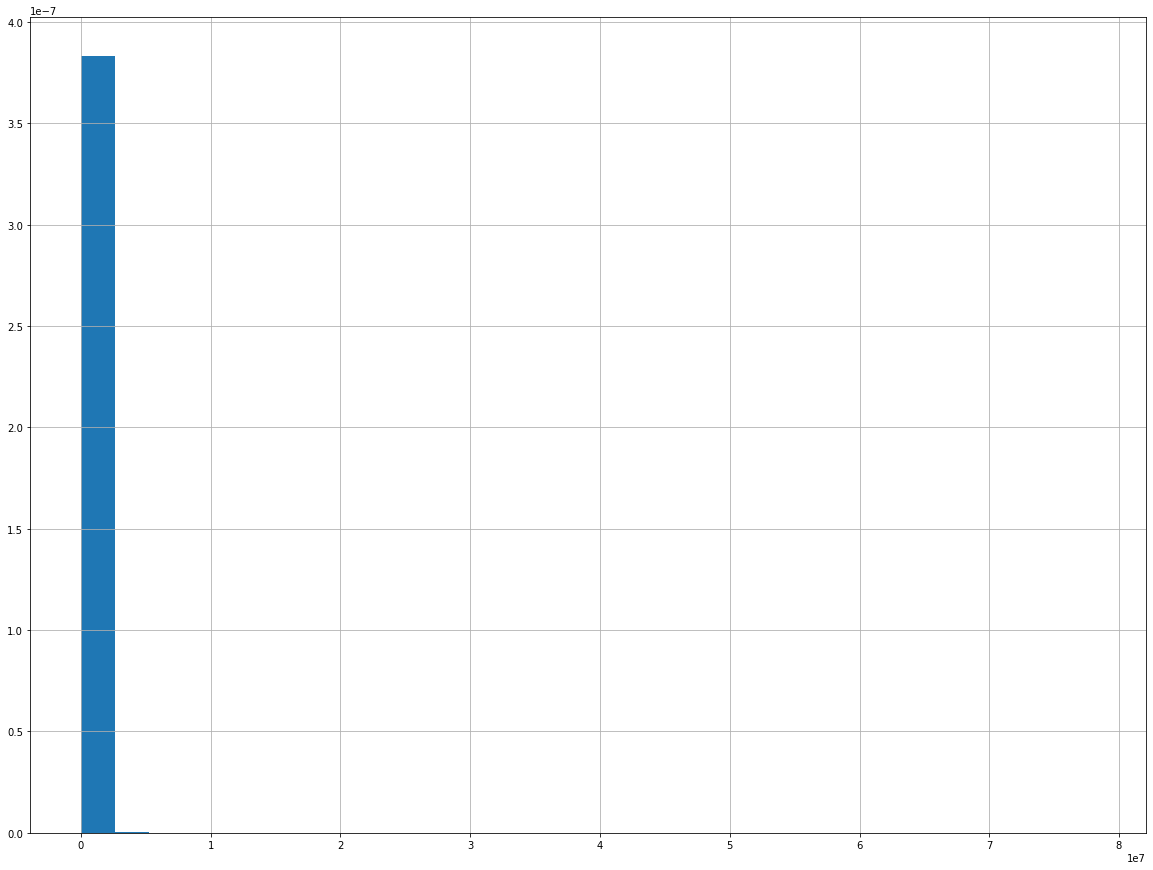

In [17]:
fig, ax = plt.subplots()
G_pre.RTT.hist(ax=ax, bins=30, density=True)
# ax.set_xscale('log')

(array([1.48714639e-02, 1.74377397e-01, 2.14703623e-01, 1.90591127e-01,
        1.78472755e-01, 1.65880382e-01, 2.78758206e-01, 2.09918251e-01,
        1.57841336e-01, 1.80885798e-01, 2.63634447e-01, 3.37224757e-01,
        2.54816579e-01, 3.28020431e-01, 5.17429191e-01, 4.37496285e-01,
        8.90982907e-01, 2.86046485e-01, 2.18494371e-02, 6.22087820e-03,
        2.74802917e-03, 1.78673579e-03, 3.77492761e-03, 1.17878153e-03,
        4.70837577e-04, 1.35661132e-03, 1.13975602e-03, 6.93599441e-04,
        3.79707723e-05, 1.60321039e-05]),
 array([2.0374265 , 2.23261605, 2.4278056 , 2.62299516, 2.81818471,
        3.01337426, 3.20856381, 3.40375337, 3.59894292, 3.79413247,
        3.98932203, 4.18451158, 4.37970113, 4.57489068, 4.77008024,
        4.96526979, 5.16045934, 5.35564889, 5.55083845, 5.746028  ,
        5.94121755, 6.13640711, 6.33159666, 6.52678621, 6.72197576,
        6.91716532, 7.11235487, 7.30754442, 7.50273398, 7.69792353,
        7.89311308]),
 <a list of 30 Patch obj

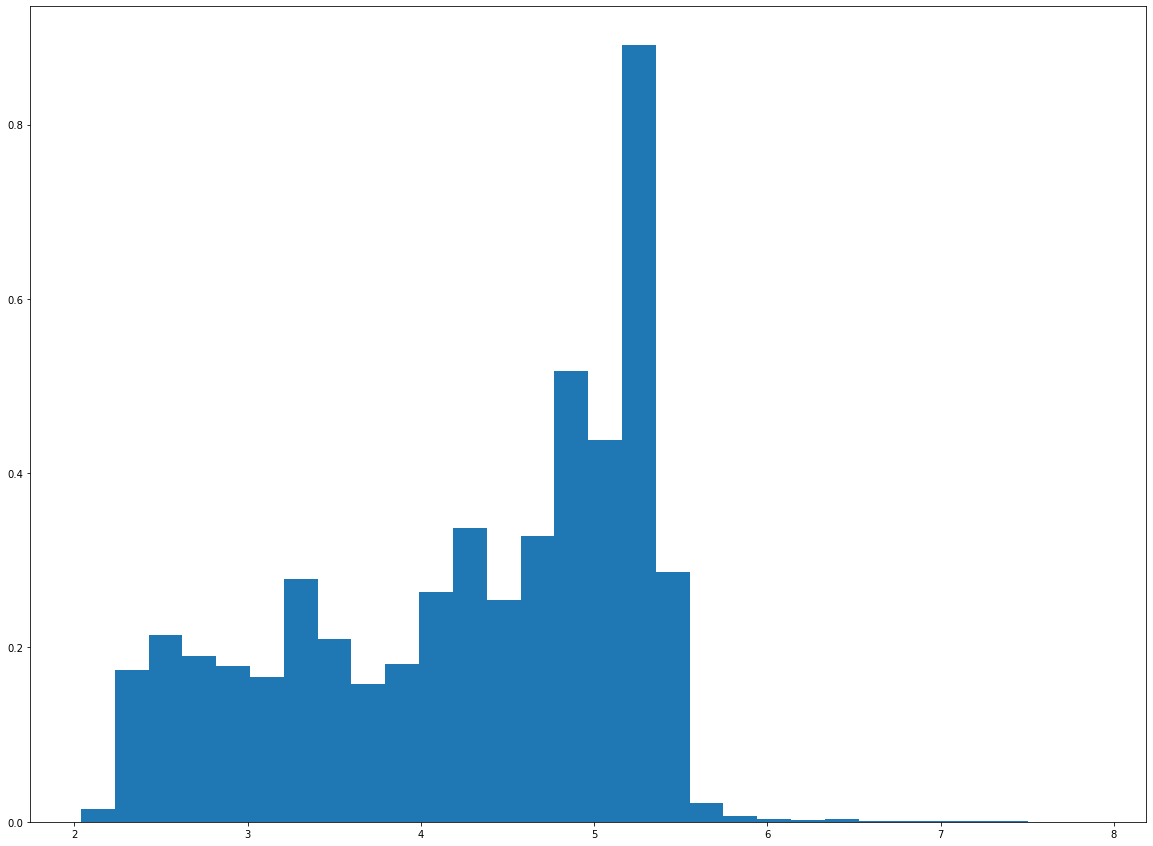

In [18]:
plt.hist(np.log10(G_pre.RTT), bins=30, density=True) 

In [22]:
s_top20.index

Int64Index([612861, 355078, 355079, 308020, 308021, 355080, 546340, 264826,
            449583, 546339,
            ...
            367593, 136825, 182569,  97906,  15681, 109521, 137340, 303686,
             38143, 448619],
           dtype='int64', length=135663)

(array([1.51292021e-02, 1.75997529e-01, 2.16777357e-01, 1.95150783e-01,
        1.81680046e-01, 1.55764168e-01, 2.91786421e-01, 2.15273193e-01,
        1.60815104e-01, 1.78934179e-01, 2.66034930e-01, 3.33756447e-01,
        2.62118180e-01, 3.24108464e-01, 5.03837539e-01, 4.33049106e-01,
        8.64128570e-01, 3.30671719e-01, 2.59386262e-02, 6.55338370e-03,
        2.61903575e-03, 1.82671520e-03, 1.73937109e-03, 1.22410520e-03,
        5.10544580e-04, 1.17667757e-03, 1.09169411e-03, 5.83295573e-04,
        4.65692198e-05, 1.67391665e-05]),
 array([2.0374265 , 2.23166388, 2.42590125, 2.62013863, 2.81437601,
        3.00861338, 3.20285076, 3.39708814, 3.59132552, 3.78556289,
        3.97980027, 4.17403765, 4.36827503, 4.5625124 , 4.75674978,
        4.95098716, 5.14522453, 5.33946191, 5.53369929, 5.72793667,
        5.92217404, 6.11641142, 6.3106488 , 6.50488618, 6.69912355,
        6.89336093, 7.08759831, 7.28183568, 7.47607306, 7.67031044,
        7.86454782]),
 <a list of 30 Patch obj

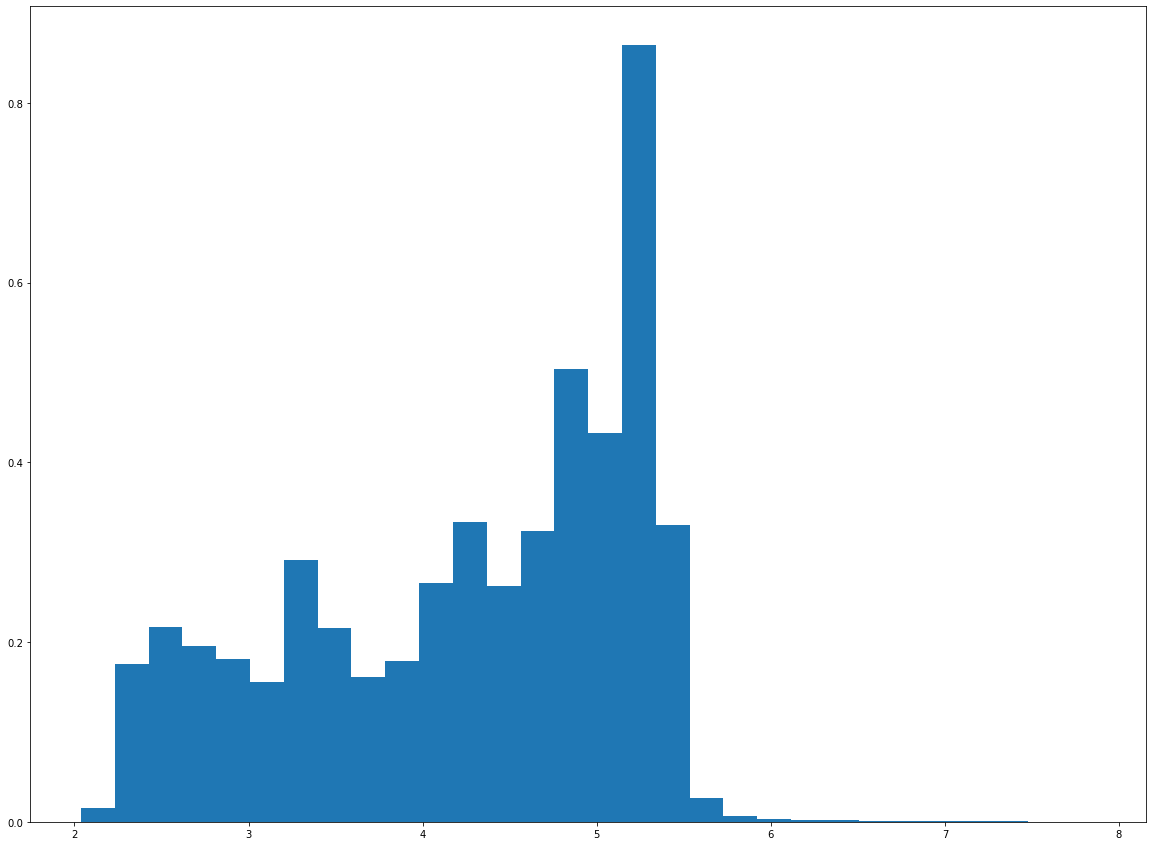

In [24]:
G_pre_sub = G_pre.loc[G_pre['IP_SRC'].isin(s_top20.index)]

In [25]:
len(G_pre_sub)

23989874

In [26]:
len(G_pre)

24286588

In [ ]:
plt.hist(np.log10(G_pre_sub.RTT), bins=30, density=True) 

In [27]:
import time
start_time = time.time()

In [30]:
print(str(time.time))

<built-in function time>


In [28]:
print(time.time() - start_time)

16.604605674743652


In [ ]:
df_labeled.groupby(['IP_SRC', 'IP_DST'])

In [34]:
edges = edges_appear = [e for e in G_real.edges if e in G_pre.edges]

In [42]:
differences = [(G_real[u][v]['weight'] - G_pre[u][v]['weight']) for (u, v) in edges]

In [36]:
len(differences)

504985

In [37]:
print(max(differences) - min(differences))

119907551.0


In [38]:
from scipy import stats
print(stats.describe(differences))

DescribeResult(nobs=504985, minmax=(-52892296.0, 67015255.0), mean=-1894.9363456340288, variance=353662715754.24774, skewness=4.42320880540724, kurtosis=2118.7575565399125)


In [39]:
dir_temp = "./temp/"
addr = dir_temp + 'diff_' + utils.toStrYearMonth(year, month) + '.pkl'
import pickle

In [40]:
def save_pkl(in_dir):
    with open(in_dir, 'wb') as file:
        pickle.dump(differences, file)
        return True
    return False

In [41]:
def read_pkl(in_dir):
    with open(in_dir, 'rb') as file:
        obj = pickle.load(file)
        return obj

FileNotFoundError: [Errno 2] No such file or directory: './temp/diff_201308.pkl'

In [43]:
save_pkl(addr)

True

In [ ]:
differences = read_pkl(addr)

In [14]:
len(differences)

504985

In [15]:
map(int, differences)

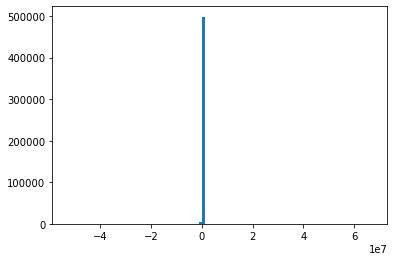

In [86]:
hist = plt.hist(differences, 100)

(array([2.99725251e-04, 1.13310766e-03, 1.94455894e-03, 3.36277111e-03,
        4.87601810e-03, 8.42154851e-03, 1.26250124e-02, 1.85171722e-02,
        2.89710041e-02, 3.68223436e-02, 5.21448833e-02, 7.95733989e-02,
        1.20679620e-01, 1.77963695e-01, 2.71075903e-01, 4.22926950e-01,
        6.14217453e-01, 7.77282610e-01, 7.19603775e-01, 2.51908108e-01,
        5.27808856e-02, 1.31732903e-02, 4.72250029e-03, 3.41394371e-03,
        3.12883920e-03, 3.52359929e-03, 2.96070065e-03, 2.60249242e-03,
        5.77519386e-04, 7.31037197e-05]),
 array([-0.30103   , -0.03012321,  0.24078358,  0.51169037,  0.78259716,
         1.05350395,  1.32441074,  1.59531753,  1.86622432,  2.13713111,
         2.40803789,  2.67894468,  2.94985147,  3.22075826,  3.49166505,
         3.76257184,  4.03347863,  4.30438542,  4.57529221,  4.846199  ,
         5.11710578,  5.38801257,  5.65891936,  5.92982615,  6.20073294,
         6.47163973,  6.74254652,  7.01345331,  7.2843601 ,  7.55526689,
         7.82617

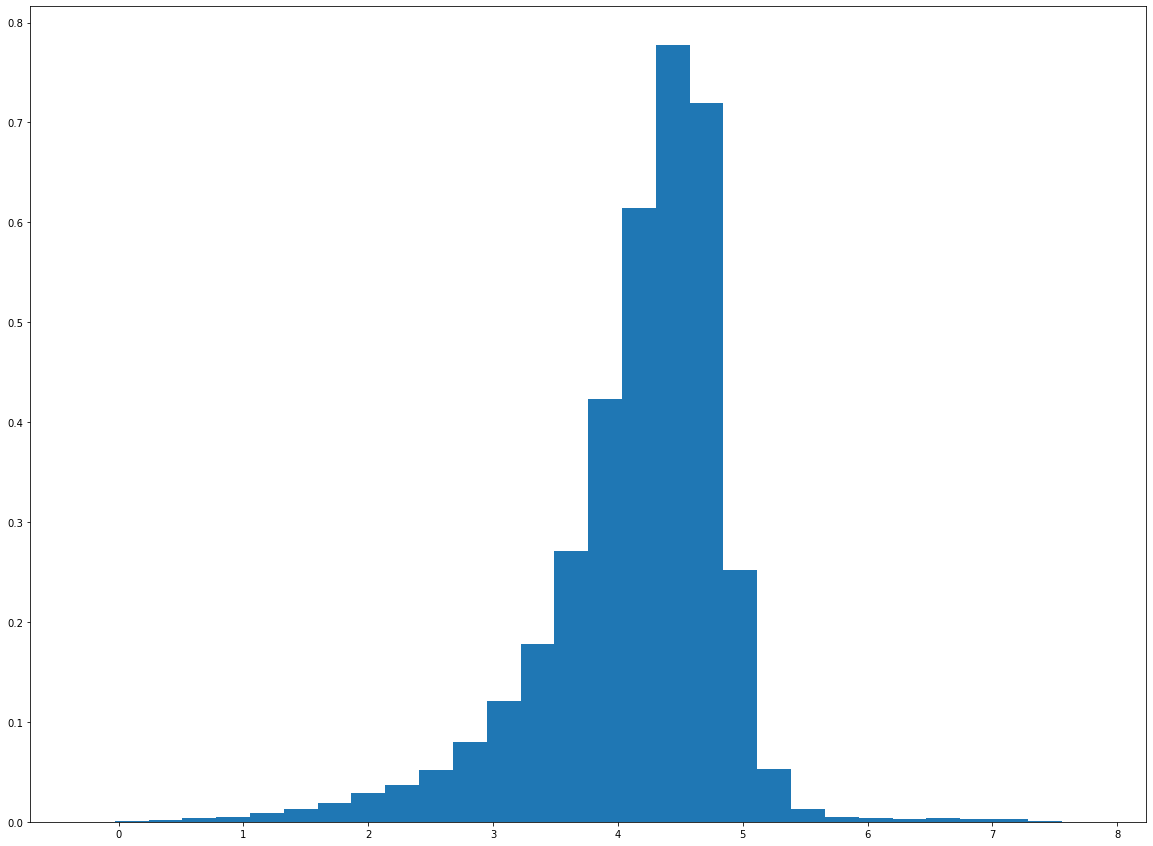

In [61]:
plt.hist(np.log10(differences_without_0), bins=30, density=True) 

In [46]:
c = 0
for d in differences:
    if d == 0:
        c = c+1
        
c

44

In [59]:
differences_without_0 = [abs(d) for d in differences if d != 0]

In [71]:
len(differences_without_0)

504941

In [65]:
nodes_sub = [n for n in s_top20 if n in G_pre]
nodes_sub = [n for n in nodes_sub if n in G_real]

In [67]:
G_pre_sub = G_pre.subgraph(nodes_sub)
G_real_sub = G_real.subgraph(nodes_sub)

In [ ]:
plt.hist(np.log10(differences_without_0), bins=30, density=True) 

In [68]:
edges_sub = [e for e in G_real_sub.edges if e in G_pre_sub.edges]
differences_top20 = [(G_real_sub[u][v]['weight'] - G_pre_sub[u][v]['weight']) for (u, v) in edges_sub]

In [73]:
len(edges)

504985

In [74]:
len(edges_sub)

3860

(array([0.00209589, 0.00733561, 0.00628766, 0.01362327, 0.03039037,
        0.03772598, 0.05344514, 0.07126018, 0.06811635, 0.10898616,
        0.0859314 , 0.11003411, 0.13518476, 0.17500662, 0.21692438,
        0.2724654 , 0.45375969, 0.58370473, 0.64238959, 0.51978016,
        0.31019138, 0.11108205, 0.01152738, 0.00523972, 0.00314383,
        0.00419178, 0.00104794, 0.00209589, 0.        , 0.00104794]),
 array([-0.30103   , -0.05375101,  0.19352797,  0.44080695,  0.68808593,
         0.93536491,  1.18264389,  1.42992288,  1.67720186,  1.92448084,
         2.17175982,  2.4190388 ,  2.66631778,  2.91359676,  3.16087575,
         3.40815473,  3.65543371,  3.90271269,  4.14999167,  4.39727065,
         4.64454964,  4.89182862,  5.1391076 ,  5.38638658,  5.63366556,
         5.88094454,  6.12822353,  6.37550251,  6.62278149,  6.87006047,
         7.11733945]),
 <a list of 30 Patch objects>)

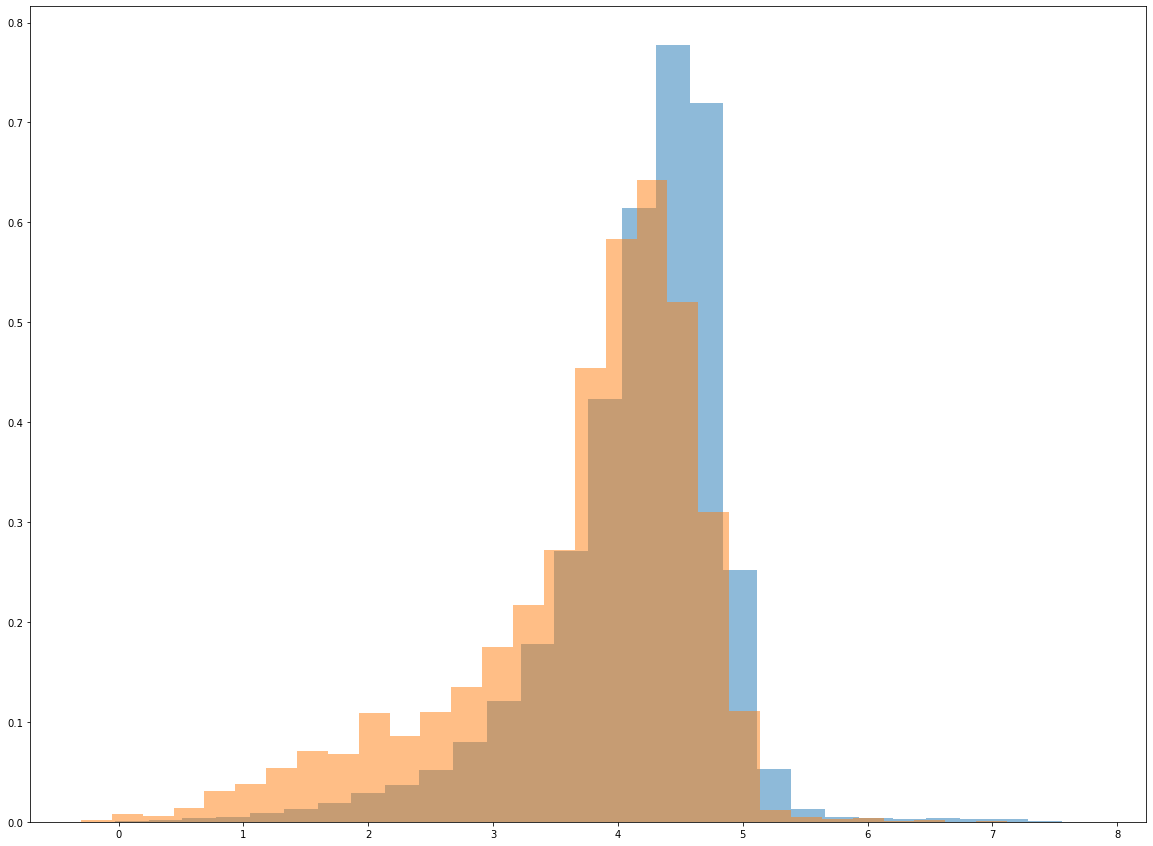

In [79]:
plt.hist(np.log10(differences_without_0), bins=30, density=True, alpha = 0.5) 
plt.hist(np.log10(differences_top20_without_0), bins=30, density=True, alpha = 0.5) 

The edge differences for top 20 pertile active nodes latency changes is lower than the global one.

In [75]:
differences_top20_without_0 = [abs(d) for d in differences_top20 if d != 0]

In [78]:
len(differences_top20_without_0)

3859

## TODO
1. Racci curvature for first 3 months
2. Racci curvature for first 3 months for the top 20 active nodes.

### Check if there is any changes 

In [87]:
hist

(array([1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 7.0000e+00, 1.2000e+01, 9.0000e+00,
        9.0000e+00, 2.2000e+01, 2.4000e+01, 4.0000e+01, 4.7000e+01,
        6.3000e+01, 4.1000e+01, 3.6000e+01, 4.7000e+01, 9.3000e+01,
        9.2000e+01, 1.1900e+02, 2.1700e+02, 4.5360e+03, 4.9844e+05,
        3.0400e+02, 1.6600e+02, 1.0800e+02, 1.1400e+02, 5.8000e+01,
        6.3000e+01, 4.7000e+01, 4.9000e+01, 3.3000e+01, 3.5000e+01,
        1.4000e+01, 2.1000e+01, 1.7000e+01, 1.0000e+01, 1.2000e+01,
        1.3000e+01, 5.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00,
        5.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

In [88]:
x = hist[1]

In [89]:
range_nxt = (x[44], x[45])

range_nxt

(-132973.56000000238, 1066101.950000003)

In [90]:
hist_nxt = [d for d in differences if d >= x[44] and d <= x[45]]

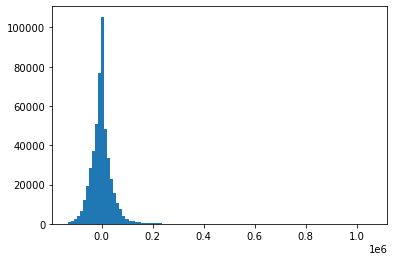

In [91]:
hist = plt.hist(hist_nxt, 100)

### Check if the next graph share similar pattern

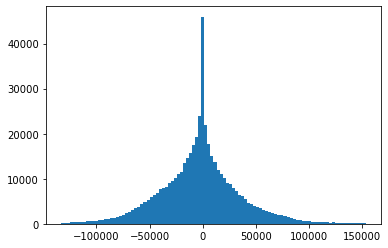

In [92]:
x = hist[1]
hist_nxt = [d for d in differences if d >= x[0] and d <= x[24]]
hist = plt.hist(hist_nxt, 100)

In [73]:
hist

(array([9.98000e+02, 1.67300e+03, 2.48600e+03, 4.03700e+03, 6.75700e+03,
        1.19670e+04, 1.92390e+04, 2.86110e+04, 3.71220e+04, 5.08160e+04,
        7.67520e+04, 1.05467e+05, 4.83720e+04, 3.36560e+04, 2.26630e+04,
        1.54640e+04, 1.07000e+04, 7.32800e+03, 4.01500e+03, 2.25500e+03,
        1.49800e+03, 1.20500e+03, 8.64000e+02, 7.94000e+02, 5.71000e+02,
        5.37000e+02, 4.75000e+02, 3.59000e+02, 2.43000e+02, 1.95000e+02,
        1.87000e+02, 1.16000e+02, 1.11000e+02, 5.40000e+01, 7.20000e+01,
        6.10000e+01, 6.10000e+01, 4.10000e+01, 4.70000e+01, 5.00000e+01,
        4.40000e+01, 3.80000e+01, 2.40000e+01, 3.60000e+01, 2.50000e+01,
        1.40000e+01, 1.80000e+01, 1.50000e+01, 1.40000e+01, 6.00000e+00,
        1.60000e+01, 1.70000e+01, 1.20000e+01, 9.00000e+00, 1.00000e+01,
        1.20000e+01, 1.00000e+01, 6.00000e+00, 9.00000e+00, 9.00000e+00,
        6.00000e+00, 9.00000e+00, 4.00000e+00, 8.00000e+00, 6.00000e+00,
        1.10000e+01, 4.00000e+00, 3.00000e+00, 7.00

In [75]:
def zoom_hist(hist, differences, range_i_l, range_i_r, n_bins):
    x = hist[1]
    print("range: " + str(x[range_i_l]) + ", " + str(x[range_i_r]))
    hist_nxt = [d for d in differences if d >= x[range_i_l] and d <= x[range_i_l]]
    
    print(hist_nxt)
    
    hist = plt.hist(hist_nxt, n_bins)
    print(hist)
    return hist

In [79]:
x = hist[1]
hist_nxt = [d for d in differences if d >= x[11] and d <= x[12]]

hist_nxt

[73.0,
 -4.0,
 126.0,
 4.0,
 -11.0,
 7894.0,
 -12.0,
 -4.0,
 -6.0,
 3.0,
 3.5,
 -5.0,
 5.0,
 -5.0,
 -52.0,
 0.0,
 -1754.5,
 -127.0,
 -5.0,
 9.5,
 3.0,
 4.0,
 10.5,
 203.0,
 -28.5,
 131.0,
 -158.0,
 2958.0,
 -1421.0,
 6704.5,
 -998.5,
 10.0,
 -4.0,
 -1408.0,
 -450.5,
 -632.5,
 143.5,
 25.5,
 2210.0,
 -9.0,
 149.5,
 25.5,
 41.0,
 396.0,
 -205.0,
 52.0,
 8.5,
 1284.0,
 0.0,
 0.0,
 -54.5,
 -1.0,
 -3.5,
 -41.5,
 -9.5,
 85.0,
 -163.5,
 5180.0,
 5186.0,
 5999.5,
 7749.0,
 623.5,
 8285.5,
 4489.0,
 8443.5,
 1281.0,
 63.0,
 6789.0,
 4647.5,
 6108.0,
 843.0,
 2165.0,
 1232.0,
 1481.0,
 5432.0,
 65.5,
 1674.5,
 1009.0,
 -218.0,
 2667.5,
 -1611.5,
 6266.5,
 1405.5,
 1677.5,
 4922.0,
 4741.0,
 -513.5,
 -836.0,
 2583.5,
 79.0,
 6016.5,
 2386.0,
 847.0,
 588.0,
 803.0,
 3940.5,
 2190.5,
 658.0,
 5244.0,
 1314.0,
 -942.5,
 2654.0,
 1500.5,
 167.5,
 4122.0,
 1356.0,
 453.0,
 10027.5,
 830.0,
 -49.0,
 -1358.5,
 9416.5,
 4318.0,
 3197.0,
 -345.0,
 2049.0,
 -1264.0,
 1252.0,
 4314.0,
 -402.5,
 5847.5,
 59

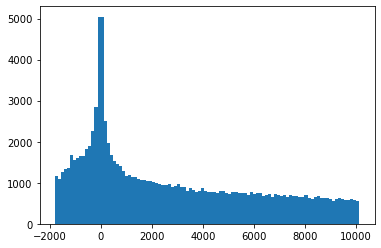

In [81]:
hist = plt.hist(hist_nxt, 100)

In [82]:
hist

(array([1167., 1097., 1256., 1324., 1359., 1682., 1556., 1599., 1651.,
        1641., 1833., 1883., 2253., 2838., 5030., 5044., 2512., 1977.,
        1665., 1534., 1459., 1404., 1290., 1157., 1194., 1144., 1141.,
        1103., 1075., 1071., 1032., 1041., 1026.,  999.,  980.,  953.,
         953.,  963.,  888.,  918.,  981.,  899.,  894.,  801.,  866.,
         835.,  775.,  799.,  860.,  809.,  785.,  774.,  763.,  744.,
         797.,  794.,  750.,  735.,  782.,  769.,  746.,  751.,  739.,
         700.,  779.,  720.,  747.,  750.,  683.,  709.,  724.,  651.,
         734.,  693.,  671.,  702.,  648.,  693.,  689.,  668.,  647.,
         647.,  690.,  631.,  605.,  660.,  677.,  617.,  634.,  622.,
         610.,  561.,  614.,  631.,  596.,  587.,  589.,  598.,  590.,
         560.]),
 array([-1802. , -1682.8, -1563.6, -1444.4, -1325.2, -1206. , -1086.8,
         -967.6,  -848.4,  -729.2,  -610. ,  -490.8,  -371.6,  -252.4,
         -133.2,   -14. ,   105.2,   224.4,   343.6,   462.8

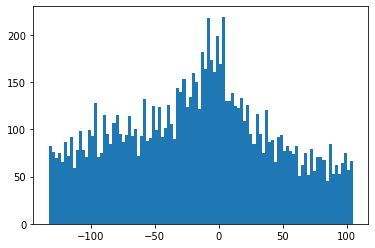

In [83]:
x = hist[1]
hist_nxt = [d for d in differences if d >= x[14] and d <= x[16]]
hist = plt.hist(hist_nxt, 100)

In [84]:
hist

(array([ 82.,  76.,  70.,  75.,  65.,  87.,  72.,  92.,  59.,  78.,  98.,
         78.,  71.,  99.,  93., 128.,  71.,  75., 115.,  95.,  84., 107.,
        115.,  95.,  87.,  94., 114.,  93., 100.,  72.,  93., 132.,  88.,
         91., 125.,  99., 123.,  92., 101., 126., 106.,  90., 144., 139.,
        153., 124., 134., 159., 150., 121., 182., 164., 218., 173., 161.,
        199., 169., 219., 130., 130., 138., 125., 122., 133., 109., 126.,
         95.,  84., 116.,  95.,  75., 120.,  86.,  89.,  65.,  92.,  94.,
         77.,  82.,  77.,  74.,  82.,  51.,  62.,  75.,  52.,  79.,  56.,
         71.,  71.,  67.,  45.,  84.,  53.,  62.,  53.,  64.,  75.,  57.,
         66.]),
 array([-133.  , -130.62, -128.24, -125.86, -123.48, -121.1 , -118.72,
        -116.34, -113.96, -111.58, -109.2 , -106.82, -104.44, -102.06,
         -99.68,  -97.3 ,  -94.92,  -92.54,  -90.16,  -87.78,  -85.4 ,
         -83.02,  -80.64,  -78.26,  -75.88,  -73.5 ,  -71.12,  -68.74,
         -66.36,  -63.98,  -61.6 ,

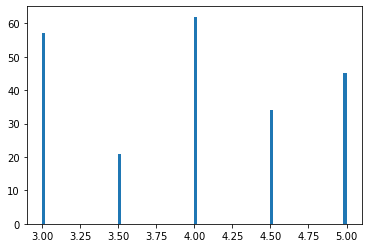

In [85]:
x = hist[1]
hist_nxt = [d for d in differences if d >= x[57] and d <= x[58]]
hist = plt.hist(hist_nxt, 100)

In [15]:
y_f = [ '%.2f' % elem for elem in y ]

y_list = []

for i_y in range(len(y) - 1):
    y_list.append(str(y_f[i_y]) + "~" + str(y_f[i_y + 1]))

In [16]:
y_list

['-5.29~-5.17',
 '-5.17~-5.05',
 '-5.05~-4.93',
 '-4.93~-4.81',
 '-4.81~-4.69',
 '-4.69~-4.57',
 '-4.57~-4.45',
 '-4.45~-4.33',
 '-4.33~-4.21',
 '-4.21~-4.09',
 '-4.09~-3.97',
 '-3.97~-3.85',
 '-3.85~-3.73',
 '-3.73~-3.61',
 '-3.61~-3.49',
 '-3.49~-3.37',
 '-3.37~-3.25',
 '-3.25~-3.13',
 '-3.13~-3.01',
 '-3.01~-2.89',
 '-2.89~-2.77',
 '-2.77~-2.65',
 '-2.65~-2.53',
 '-2.53~-2.41',
 '-2.41~-2.29',
 '-2.29~-2.17',
 '-2.17~-2.05',
 '-2.05~-1.93',
 '-1.93~-1.81',
 '-1.81~-1.69',
 '-1.69~-1.57',
 '-1.57~-1.45',
 '-1.45~-1.33',
 '-1.33~-1.21',
 '-1.21~-1.09',
 '-1.09~-0.97',
 '-0.97~-0.85',
 '-0.85~-0.73',
 '-0.73~-0.61',
 '-0.61~-0.49',
 '-0.49~-0.37',
 '-0.37~-0.25',
 '-0.25~-0.13',
 '-0.13~-0.01',
 '-0.01~0.11',
 '0.11~0.23',
 '0.23~0.35',
 '0.35~0.47',
 '0.47~0.59',
 '0.59~0.71',
 '0.71~0.83',
 '0.83~0.95',
 '0.95~1.07',
 '1.07~1.19',
 '1.19~1.31',
 '1.31~1.43',
 '1.43~1.55',
 '1.55~1.67',
 '1.67~1.79',
 '1.79~1.91',
 '1.91~2.03',
 '2.03~2.15',
 '2.15~2.26',
 '2.26~2.38',
 '2.38~2.50',
 

In [ ]:
#---------------------------#

In [61]:
df_labeled = pd.read_pickle(dir_labeled + "201307.pkl")

In [62]:
from random import sample  

sample_edges = df_labeled[['IP_SRC', 'IP_DST']].sample(n=10, random_state=1)

NameError: name 'edges' is not defined

In [29]:
sample_edges

,IP_SRC,IP_DST
961966,147128,99416
1076086,573830,573831
477307,5643,12252
65466,207854,207855
47911,466533,466534
38115,421484,314696
825810,337,1453
858488,239216,3095
19822,466530,466531
971467,49906,49907


In [47]:
edge_weights = {}

for index, row in sample_edges.iterrows():
    weights = df_labeled.loc[
        (
            (df_labeled['IP_SRC'] == row['IP_SRC']) 
            & (df_labeled['IP_DST'] == row['IP_DST'])
        )
        | (
            (df_labeled['IP_DST'] == row['IP_SRC']) 
             & (df_labeled['IP_SRC'] == row['IP_DST'])
        )
    ]['RTT'].values
    
    key = (row['IP_SRC'], row['IP_DST'])
    edge_weights[key] = weights

In [48]:
edge_weights

{(147128,
  99416): array([369503, 385305, 380029, 373084, 363607, 373548, 382636, 379607,
        368348, 363275, 365200, 265996, 270612, 267796, 270753, 273318,
        267370, 269998, 269639, 281801, 270536, 280021, 273370, 214053,
        213592, 249062, 234410, 255411, 246380, 224435, 245904, 311598,
        311965, 305162, 303963, 310398, 311684, 210068, 210186, 210066,
        209985, 210092, 210062, 210178, 210196, 210161, 210076, 210000,
        210077, 210130, 210133, 210061, 190325, 180713, 182949, 180465,
        188125, 179534, 187662, 187513, 300163, 201261, 180054, 191092,
        179274, 182883, 191098, 188698, 188388, 181630, 187402, 187206,
        187661, 188731, 186827, 178973, 180587, 197565, 182055, 188774,
        258144, 255272, 258074, 255577, 251783, 250661, 251671, 257125,
        254719, 156612, 156507, 156561, 156571, 156671, 156417, 156618,
        156431, 156698, 156469, 156762, 156506, 156764, 156459, 156382,
        156470, 158555, 156369, 157961, 15633

In [56]:
min_len_weight = sys.maxsize
for edge in edge_weights.keys():
    min_len_weight = min(min_len_weight, len(edge_weights[edge]))

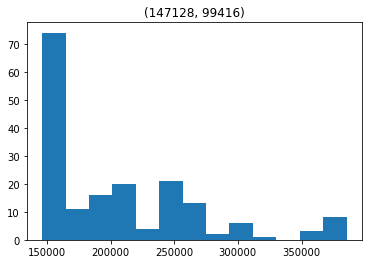

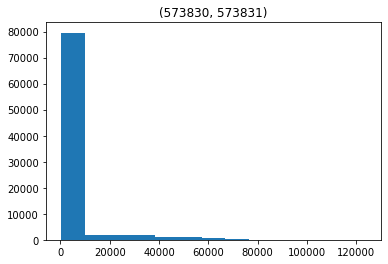

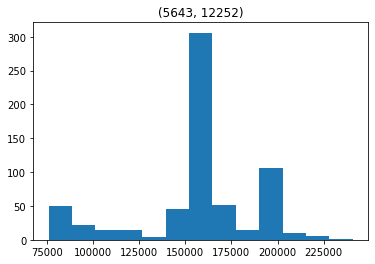

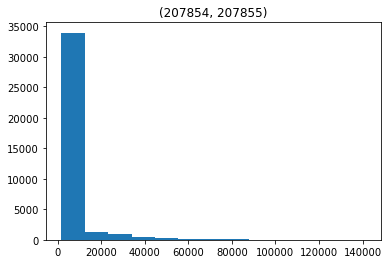

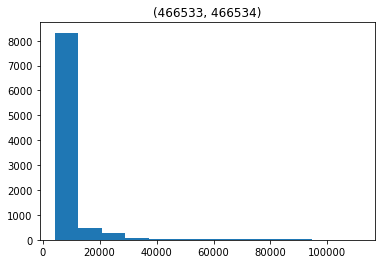

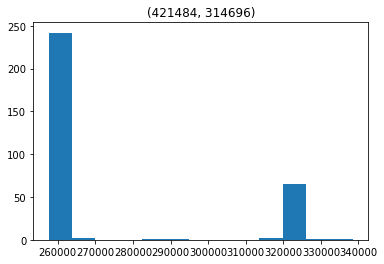

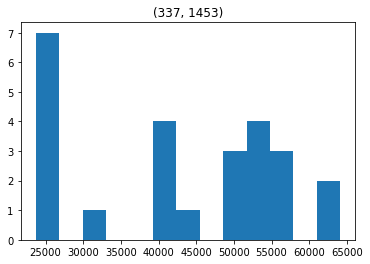

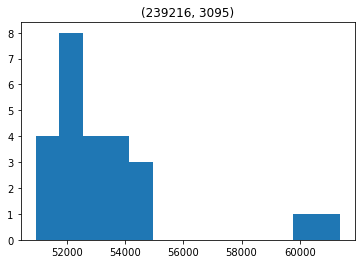

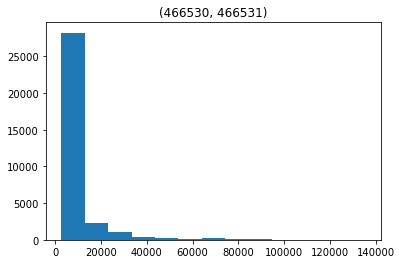

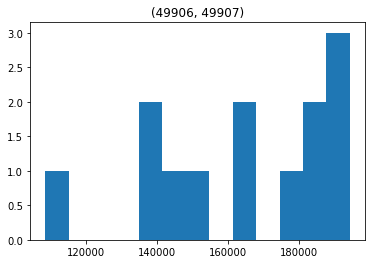

In [60]:
for edge in edge_weights.keys():
    plt.figure()
    plt.title(str(edge))
    hist = plt.hist(edge_weights[edge], min_len_weight)

In [93]:
df_labeled_0 = pd.read_pickle(dir_labeled + "201307.pkl")
df_labeled_1 = pd.read_pickle(dir_labeled + "201308.pkl")

In [94]:
from random import sample  

sample_edges = sample(edges, 10)

In [95]:
sample_edges

[(62656, 35310),
 (249309, 323607),
 (853, 4666),
 (40081, 22964),
 (8778, 209602),
 (66596, 363893),
 (70537, 184922),
 (194928, 141058),
 (221905, 95269),
 (438298, 24373)]

In [96]:
edge_weights = {}

for u, v in sample_edges:
    weights_0 = df_labeled_0.loc[
        (
            (df_labeled_0['IP_SRC'] == u) 
            & (df_labeled_0['IP_DST'] == v)
        )
        | (
            (df_labeled_0['IP_DST'] == u) 
             & (df_labeled_0['IP_SRC'] == v)
        )
    ]['RTT'].values
    weights_1 = df_labeled_1.loc[
        (
            (df_labeled_1['IP_SRC'] == u) 
            & (df_labeled_1['IP_DST'] == v)
        )
        | (
            (df_labeled_1['IP_DST'] == u) 
             & (df_labeled_1['IP_SRC'] == v)
        )
    ]['RTT'].values
    
    key = (u, v)
    edge_weights[key] = [weights_0, weights_1] 

In [97]:
min_len_weight = sys.maxsize
for edge in edge_weights.keys():
    min_len_weight = min(min_len_weight, len(edge_weights[edge][0]))
    min_len_weight = min(min_len_weight, len(edge_weights[edge][1]))
    
min_len_weight

1

In [98]:
MIN_BINS = 10

(62656, 35310)
[ 67081  67082  77468 112636  69744]
[ 59411  96040  64373 112511  89283]
(249309, 323607)
[196009 181399  84068 234043  62223  72888  74648  24493  24461  40290
  40130  40061  40189  39970 163299  54121  54329  39431  39377  39364
  39383  39380  39407 199188  40680  40536 155593  40666  48516  48486
  48473  48612 158096  17605 196868  17716  17454]
[ 75699  92166 158303  85319  33253 153430 153778  32908 205948 100757
 118729  74762  24604  24301 196763  24312  24722 181120 126864  80035
  40821  40642  40549 171261  40508  50787  76384  17462]
(853, 4666)
[217628 214842 225657 217705 218962 225532 218202 214187 218964 274880
 276221 269194 273358 312843 306014 586695 277559 458300 563017 569474
 212074 200417 200601 200672 204831 204965 200795 200459 200574 202538
 200490 232877 232720 232847 232566 241810 233866 232564 234074 233988
 234270 232746 226495 226975 230354 248305 226432 246289 227630 261905
 231509 226263 323204 248200 253509 251990 259593 248154 247849

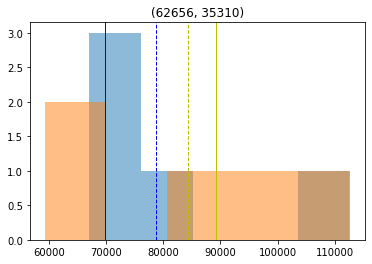

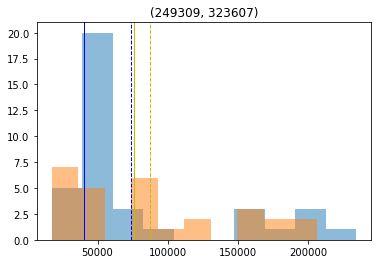

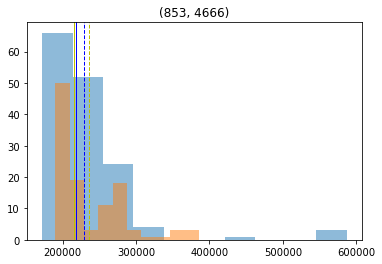

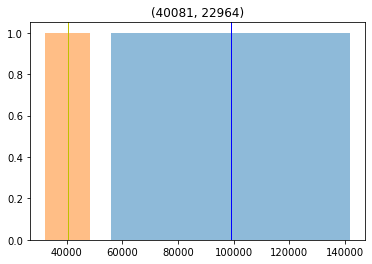

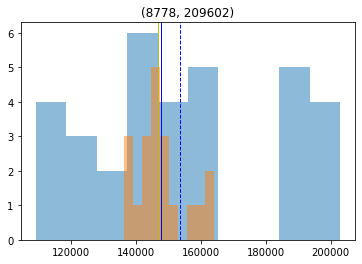

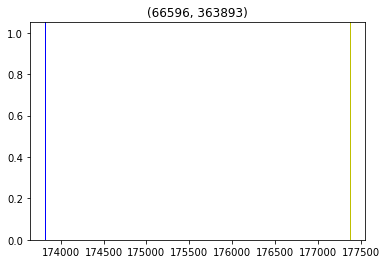

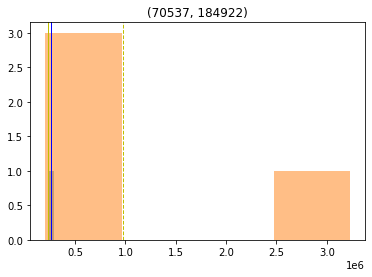

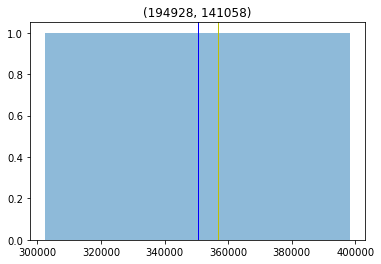

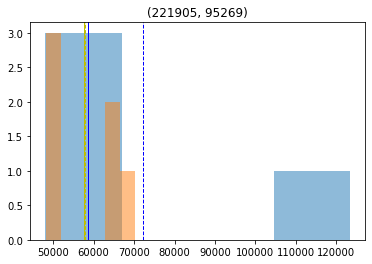

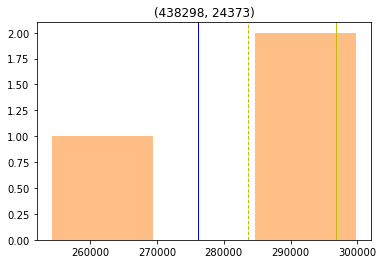

In [108]:
for edge in edge_weights.keys():
    plt.figure()
    plt.title(str(edge))
    
    print(str(edge))
    print(str(edge_weights[edge][0]))
    print(str(edge_weights[edge][1]))
    
    if len(edge_weights[edge][0]) < MIN_BINS:
        hist = plt.hist(edge_weights[edge][0], len(edge_weights[edge][0]), alpha = 0.5)
    else:
        hist = plt.hist(edge_weights[edge][0], max(min_len_weight, MIN_BINS), alpha = 0.5)
    if len(edge_weights[edge][1]) < MIN_BINS:
        hist = plt.hist(edge_weights[edge][1], len(edge_weights[edge][1]), alpha = 0.5)
    else:
        hist = plt.hist(edge_weights[edge][1], max(min_len_weight, MIN_BINS), alpha = 0.5)
        
    plt.axvline(edge_weights[edge][0].mean(), color='b', linestyle='dashed', linewidth=1)
    plt.axvline(edge_weights[edge][1].mean(), color='y', linestyle='dashed', linewidth=1)
    plt.axvline(np.median(edge_weights[edge][0]), color='b', linestyle='solid', linewidth=1)
    plt.axvline(np.median(edge_weights[edge][1]), color='y', linestyle='solid', linewidth=1)
    

In [113]:
for k in edge_weights.keys():
    w = edge_weights[k]
    print()
    print(k)
    
    print("diff of median:")
    print(np.median(w[1]) - np.median(w[0]))
    
    print("diff of mean:")
    print(w[1].mean() - w[0].mean())
    
    
    print("diff of mean minus median:")
    print(np.median(w[0]) - w[0].mean())
    print(np.median(w[1]) - w[1].mean())


(62656, 35310)
diff of median:
19539.0
diff of mean:
5521.400000000009
diff of mean minus median:
-9058.199999999997
4959.399999999994

(249309, 323607)
diff of median:
35361.5
diff of mean:
13270.524131274142
diff of mean minus median:
-33413.29729729729
-11322.321428571435

(853, 4666)
diff of median:
-2339.0
diff of mean:
7822.924761904753
diff of mean minus median:
-10429.146666666667
-20591.07142857142

(40081, 22964)
diff of median:
-58485.5
diff of mean:
-58485.5
diff of mean minus median:
0.0
0.0

(8778, 209602)
diff of median:
-825.0
diff of mean:
-5954.160606060614
diff of mean minus median:
-5948.060606060608
-818.8999999999942

(66596, 363893)
diff of median:
3546.0
diff of mean:
3546.0
diff of mean minus median:
0.0
0.0

(70537, 184922)
diff of median:
-32456.0
diff of mean:
709663.1666666667
diff of mean minus median:
-373.33333333331393
-742492.5

(194928, 141058)
diff of median:
6300.0
diff of mean:
6300.0
diff of mean minus median:
0.0
0.0

(221905, 95269)
diff of med